In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

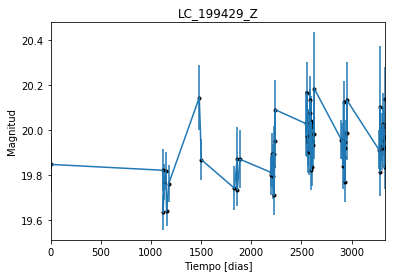

In [2]:
data = np.genfromtxt('LC_199429_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_199429_Z')
plt.savefig("LC_199429_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

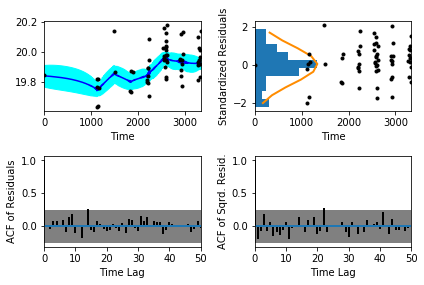

In [5]:
sample.assess_fit()

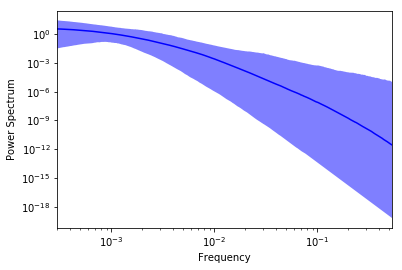

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

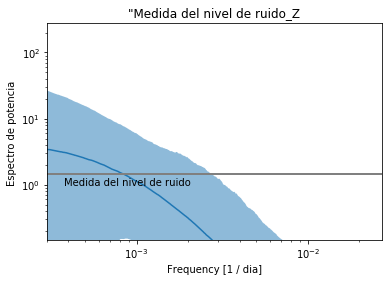

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_199429_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_199429_Z')

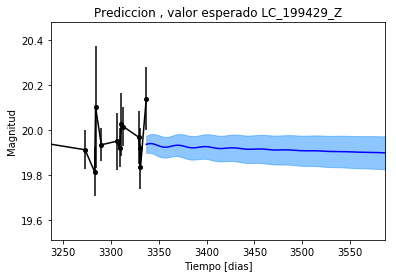

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_199429_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_199429_Z')

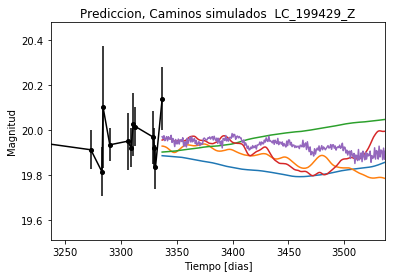

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_199429_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


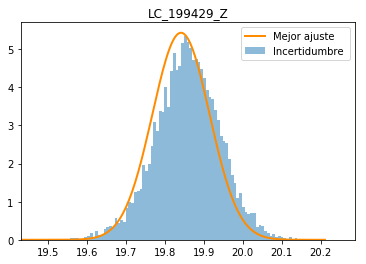

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_199429_Z')
plt.savefig("Mejor_ajuste_LC_199429_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_199429_Z')

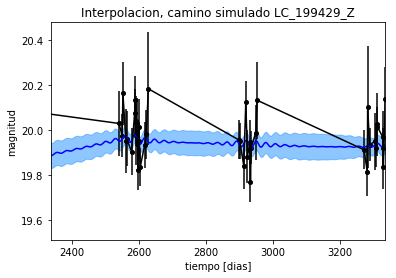

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_199429_Z')

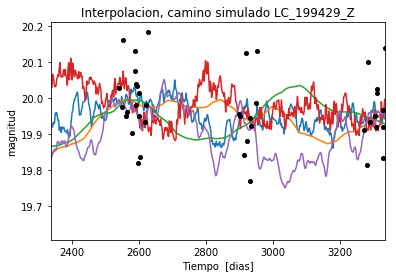

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1081.73847666
Median: 0.00874869214634
Standard deviation: 0.190470176656
68% credibility interval: [ 0.00071025  0.17067711]
95% credibility interval: [  3.41357707e-04   7.66834061e-01]
99% credibility interval: [  3.09103893e-04   9.87118553e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 772.945968976
Median: 0.0017831523959
Standard deviation: 0.0795687363177
68% credibility interval: [ 0.00046107  0.02708596]
95% credibility interval: [ 0.00032276  0.2518583 ]
99% credibility interval: [  3.05441924e-04   5.77900430e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 300.3594564
Median: 0.0212089683464
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1741.80989447
Median: 79.1491046962
Standard deviation: 1.538557059
68% credibility interval: [ 77.37564898  80.21319878]
95% credibility interval: [ 74.94286989  80.73415061]
99% credibility interval: [ 72.8491558   80.90420131]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 413.573967718
Median: 0.744102888997
Standard deviation: 2.13572724285
68% credibility interval: [ 0.06932644  3.89061757]
95% credibility interval: [ 0.01496359  7.13480986]
99% credibility interval: [ 0.01025578  9.94889453]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 525.833539333
Median: 0.262367233834
Standard deviation: 9.43821183521
68% credibility interval: [ 0.00973691  8.68853369]
95% credibility interval: [  4.71757783e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13761.4397508
Median: 1.10759691807e-42
Standard deviation: 7.14054704276e+124
68% credibility interval: [  6.51643131e-90   4.95615813e+08]
95% credibility interval: [  4.19736124e-234   1.94111268e+105]
99% credibility interval: [  2.15767923e-238   2.74939964e+118]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1735.03990387
Median: 19.8711185597
Standard deviation: 0.0521903541322
68% credibility interval: [ 19.82516667  19.91381526]
95% credibility interval: [ 19.76071081  19.97031539]
99% credibility interval: [ 19.69450678  20.02873831]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1288.18148928
Median: 0.005000134263
Standard deviation: 0.258344313728
68% credibility interval: [ 0.          0.37002667]
95% credibility interval: [ 0.          0.91760802]
99% credibility interval: [ 0.          1.02258835]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1288.18148928
Median: 0.005000134263
Standard deviation: 0.258344313728
68% credibility interval: [ 0.          0.37002667]
95% credibility interval: [ 0.          0.91760802]
99% credibility interval: [ 0.          1.02258835]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 12009.9218471
Median: 0.0
Standard deviation: 0.00203204887539
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1741.80989447
Median: 79.1491046962
Standard deviation: 1.538557059
68% credibility interval: [ 77.37564898  80.21319878]
95% credibility interval: [ 74.94286989  80.73415061]
99% credibility interval: [ 72.8491558   80.90420131]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2151.23099339
Median: 0.00891620170742
Standard deviation: 0.0138241856193
68% credibility interval: [ 0.00471952  0.01819053]
95% credibility interval: [ 0.00247677  0.04404265]
99% credibility interval: [ 0.0015915   0.08160145]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2357.11712547
Median: 0.938317239344
Standard deviation: 0.135723098184
68% credibility interval: [ 0.82182424  1.08157532]
95% credibility interval: [ 0.71882467  1.25648499]
99% credibility interval: [ 0.66232413  1.37278929]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 928.122369553
Median: 2.49004263397e-05
Standard deviation: 0.155039080876
68% credibility interval: [  3.59356286e-13   4.69457666e-03]
95% credibility interval: [  7.65818169e-109   1.97467095e-001]
99% credibility interval: [  1.39390911e-120   9.66636221e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1081.73847666
Median: (-0.0549696539509+0j)
Standard deviation: 2.01670353201
68% credibility interval: [-1.07239591+0.j         -0.00446263-1.27080017j]
95% credibility interval: [ -4.81816050e+00+0.j          -2.14481373e-03-4.40969224j]
99% credibility interval: [ -6.20224879e+00+0.j          -1.94215704e-03-0.00115717j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 772.945968976
Median: (-0.0112038769344+0.0151864164551j)
Standard deviation: 1.69847141735
68% credibility interval: [-0.17018612+0.7878866j -0.00289701+0.0027063j]
95% credibility interval: [-1.58247238+3.82522058j -0.00202796+0.0336373j ]
99% credibility interval: [ -3.63105549e+00+5.89631026j  -1.91914821e-03+0.j        ]
Posterior summary for para